### Import Library

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Model

### Data Preparation

In [2]:
basic_path = "./Dataset/"
img_path = os.path.join(basic_path, 'Images')
attr_path = os.path.join(basic_path, 'list_attribute.txt') 

### Melihat Jumlah Gambar

In [3]:
n_images = len(os.listdir(img_path))
print(f'Total Gambar : {n_images}')

Total Gambar : 5017


### Melihat Jumlah Data pada "list_attribute.txt"

In [4]:
df_attr = pd.read_csv('./Dataset/list_attribute.txt', sep="\s+", skiprows=1, usecols=['Male'])

In [5]:
# Ubah kolom ke bentuk kategorikal
df_attr.loc[df_attr['Male'] == -1,'Male'] = "Female"
df_attr.loc[df_attr['Male'] == 1,'Male'] = "Male"

df_attr.columns=['Gender']

In [6]:
df_attr.head()

,Gender
000001.jpg,Female
000002.jpg,Female
000003.jpg,Male
000004.jpg,Female
000005.jpg,Female


In [7]:
print(f'Jumlah data pada list_attribute : {df_attr.shape[0]}')

Jumlah data pada list_attribute : 202599


### Mencocokkan Data Images dengan Data Atrribute

In [8]:
img = os.listdir("./Dataset/Images/")

df_attr = df_attr[df_attr.index.isin(img)]
df_attr.head()

,Gender
000051.jpg,Male
000052.jpg,Male
000065.jpg,Male
000166.jpg,Male
000198.jpg,Female


In [9]:
print(f'Jumlah dataset : {df_attr.shape[0]}')

Jumlah dataset : 5000


### Melihat Jumlah Attribute

In [78]:
attr = pd.read_csv('./Dataset/list_attribute.txt', sep="\s+", skiprows=1)
attr.replace(to_replace=-1, value=0, inplace=True) #Mengubah nilai -1 menjadi 0

In [79]:
for i, j in enumerate(attr.columns):
    print(i, j)

0 5_o_Clock_Shadow
1 Arched_Eyebrows
2 Attractive
3 Bags_Under_Eyes
4 Bald
5 Bangs
6 Big_Lips
7 Big_Nose
8 Black_Hair
9 Blond_Hair
10 Blurry
11 Brown_Hair
12 Bushy_Eyebrows
13 Chubby
14 Double_Chin
15 Eyeglasses
16 Goatee
17 Gray_Hair
18 Heavy_Makeup
19 High_Cheekbones
20 Male
21 Mouth_Slightly_Open
22 Mustache
23 Narrow_Eyes
24 No_Beard
25 Oval_Face
26 Pale_Skin
27 Pointy_Nose
28 Receding_Hairline
29 Rosy_Cheeks
30 Sideburns
31 Smiling
32 Straight_Hair
33 Wavy_Hair
34 Wearing_Earrings
35 Wearing_Hat
36 Wearing_Lipstick
37 Wearing_Necklace
38 Wearing_Necktie
39 Young


### Melihat Jumlah Class

In [28]:
df_attr['Gender'].value_counts()

Female    2953
Male      2047
Name: Gender, dtype: int64

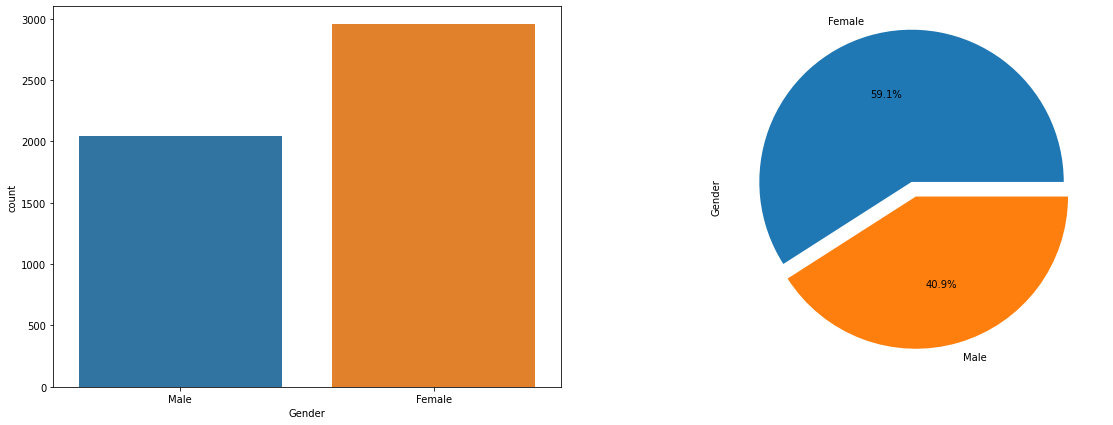

In [33]:
fig, ax = plt.subplots(1,2, figsize=(20,7))

sns.countplot(x=df_attr["Gender"], ax=ax[0])
df_attr["Gender"].value_counts().plot.pie(explode=[0.1, 0],autopct="%1.1f%%",labels=["Female", "Male"], ax=ax[1])

plt.show()

### Menampilkan Sample Image

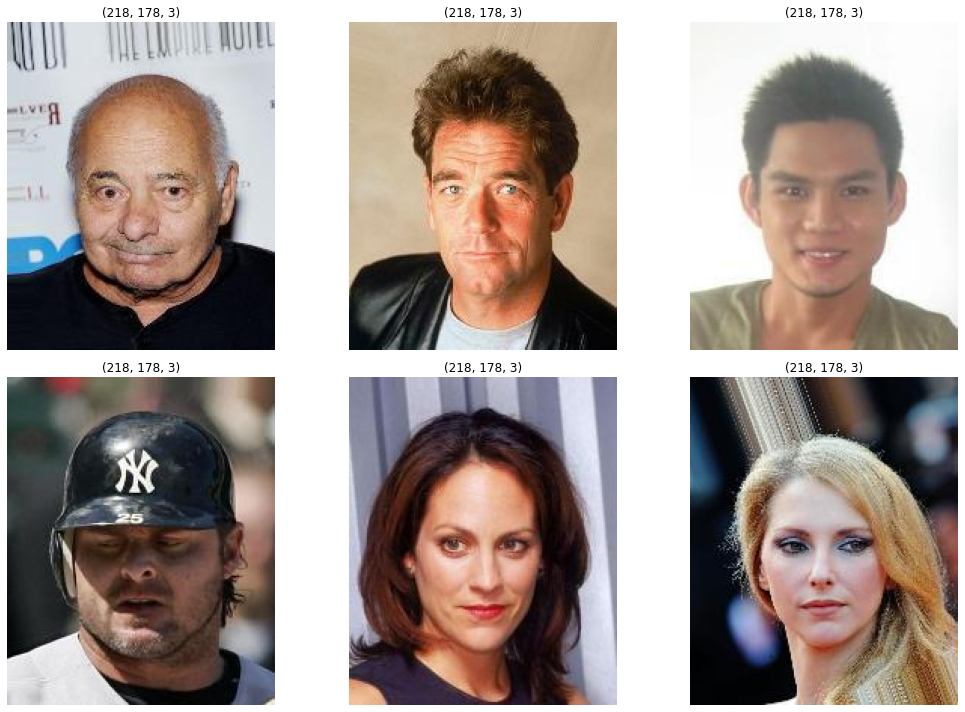

In [50]:
plt.figure(figsize=(15, 10))
for i in range(0, 6):
    plt.subplot(2, 3, i+1)
    
    # Read an Image.
    img = cv2.imread(img_path + '/' + df_attr.index[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Display Image.
    plt.imshow(img)
    plt.title(img.shape)
    plt.axis('off')
    
plt.tight_layout()
plt.show()

Attractive    1
Smiling       0
Male          0
Young         1
Name: 000201.jpg, dtype: int64

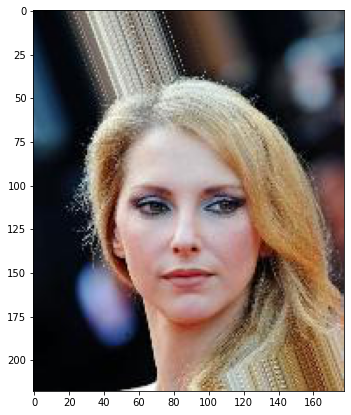

In [86]:
# plot gambar dan attributes
sample = "./Dataset/Images/000201.jpg"

plt.figure(figsize=(7, 7))

img = load_img(sample)
plt.grid(False)
plt.imshow(img)
attr.loc[sample.split('/')[-1]][['Attractive','Smiling','Male','Young']] #some attributes

### Bagi dataset menjadi data Train, Validation, dan Test

__Pembagian dataset menjadi 3 yaitu berdasarkan file dari sumber dari dataset dengan nama file "list_eval_partition.txt"__ 

In [97]:
df_partition = pd.read_csv('./Dataset/list_eval_partition.txt', sep="\s+", skiprows=0, header=None)
df_partition.columns = ['Filename', 'Partition']
df_partition = df_partition.set_index('Filename')

df_partition.head()

,Partition
Filename,
000001.jpg,0
000002.jpg,0
000003.jpg,0
000004.jpg,0
000005.jpg,0


In [98]:
df_partition.shape[0]

202599

In [99]:
#mencocokkan data pada file partition dengan data images

img = os.listdir("./Dataset/Images/")

df_partition = df_partition[df_partition.index.isin(img)]

In [100]:
df_partition.head()

,Partition
Filename,
000051.jpg,0
000052.jpg,0
000065.jpg,0
000166.jpg,0
000198.jpg,0


In [101]:
df_partition.shape[0]

5000

In [111]:
dfGenderPartition = df.merge(df_partition, left_index=True, right_index=True)
dfGenderPartition.head()

,Male,Partition
000051.jpg,1,0
000052.jpg,1,0
000065.jpg,1,0
000166.jpg,1,0
000198.jpg,0,0


__Menyimpan file yang sudah di splitting__

- 0 = Train
- 1 = Validation
- 2 = Test

In [122]:
dfGenderPartition.loc[dfGenderPartition['Partition'] == 0].to_csv('train.csv', index_label='Filename')
dfGenderPartition.loc[dfGenderPartition['Partition'] == 1].to_csv('validation.csv', index_label='Filename')
dfGenderPartition.loc[dfGenderPartition['Partition'] == 2].to_csv('test.csv', index_label='Filename')

In [9]:
df_train = pd.read_csv('train.csv')
df_val = pd.read_csv('validation.csv')
df_test = pd.read_csv('test.csv')

del df_train['Partition']
del df_val['Partition']
del df_test['Partition']

In [10]:
df_train.loc[df_train['Male'] == 0,'Male'] = "Female"
df_train.loc[df_train['Male'] == 1,'Male'] = "Male"
df_train.columns=['Filename','Gender']

In [11]:
df_val.loc[df_val['Male'] == 0,'Male'] = "Female"
df_val.loc[df_val['Male'] == 1,'Male'] = "Male"
df_val.columns=['Filename','Gender']

In [12]:
df_test.loc[df_test['Male'] == 0,'Male'] = "Female"
df_test.loc[df_test['Male'] == 1,'Male'] = "Male"
df_test.columns=['Filename','Gender']

In [13]:
print('Jumlah data train : ', df_train.shape[0])
print('Jumlah data validation : ', df_val.shape[0])
print('Jumlah data test : ', df_test.shape[0])

Jumlah data train :  4024
Jumlah data validation :  480
Jumlah data test :  496


In [14]:
df_train.head()

,Filename,Gender
0,000051.jpg,Male
1,000052.jpg,Male
2,000065.jpg,Male
3,000166.jpg,Male
4,000198.jpg,Female


### Resize Image dari (218, 178) ke (128, 128)

In [140]:
from PIL import Image

In [142]:
for filename in os.listdir(img_path):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_path = os.path.join(img_path, filename)
        image = Image.open(image_path)
        resized_image = image.resize((128, 128))  # Set the desired new dimensions
        resized_image.save(image_path)

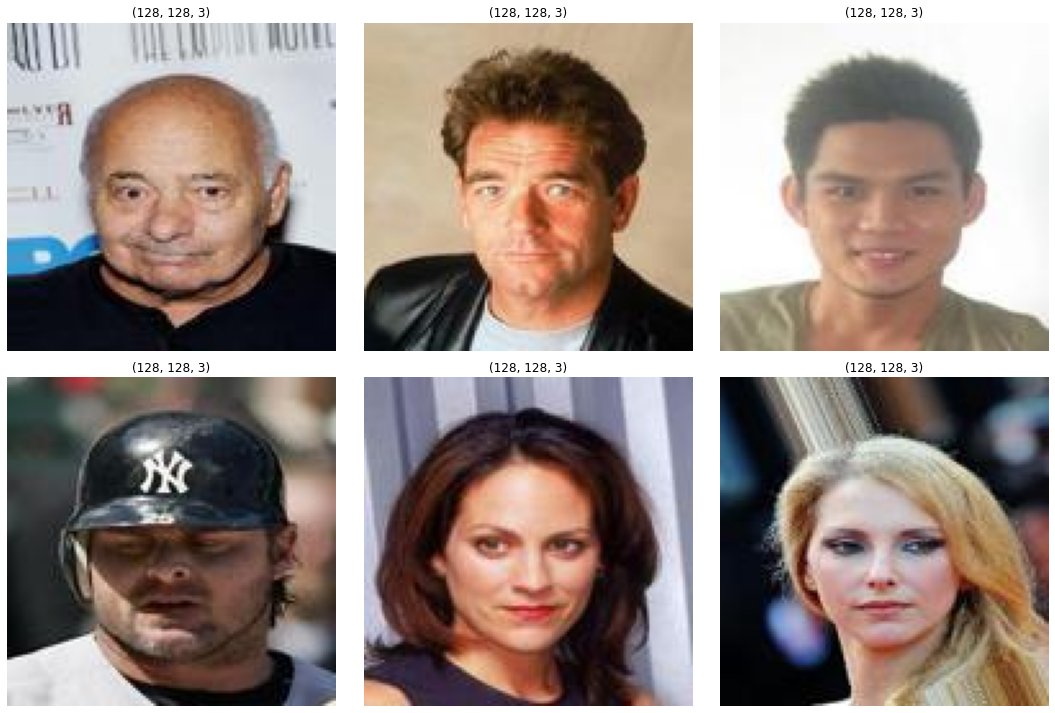

In [10]:
plt.figure(figsize=(15, 10))
for i in range(0, 6):
    plt.subplot(2, 3, i+1)
    
    # Read an Image.
    img = cv2.imread(img_path + '/' + df_attr.index[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Display Image.
    plt.imshow(img)
    plt.title(img.shape)
    plt.axis('off')
    
plt.tight_layout()
plt.show()

### Membuat Data Generator untuk data Train dan Validation

In [15]:
IMAGE_SIZE = (128, 128)
BATCH_SIZE = 32

In [16]:
# Generate Train Images Data Generator.
train_datagen = ImageDataGenerator(
    rotation_range=30,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2
)

train_generator = train_datagen.flow_from_dataframe(
    df_train, 
    img_path + "/", 
    x_col='Filename',
    y_col='Gender',
    target_size=IMAGE_SIZE, class_mode='binary',
    batch_size=BATCH_SIZE
)

Found 4024 validated image filenames belonging to 2 classes.


In [17]:
# Generate Validation Images Data Generator.
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    df_val, 
    img_path + "/", 
    x_col='Filename',
    y_col='Gender',
    target_size=IMAGE_SIZE,
    class_mode='binary',
    batch_size=BATCH_SIZE
)

Found 480 validated image filenames belonging to 2 classes.


In [18]:
# Generate Test Images Data Generator.
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    df_test, 
    img_path + "/",  
    x_col='Filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 496 validated image filenames.


### GoogleNet - InceptionV3

In [19]:
from tensorflow.keras.applications import InceptionV3

In [20]:
base_incv3_model = InceptionV3(include_top=False, input_shape= IMAGE_SIZE + (3,))

In [21]:
base_incv3_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 63, 63, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 63, 63, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 63, 63, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [22]:
#Adding custom Layers
x = base_incv3_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(256, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(128, activation="relu")(x)
predictions = Dense(2, activation="softmax")(x)

In [23]:
# creating the final model 
model_ = Model(inputs=base_incv3_model.input, outputs=predictions)

In [24]:
# compile model
model_.compile(optimizer=SGD(learning_rate=0.0001, momentum=0.9)
                    , loss='sparse_categorical_crossentropy'
                    , metrics=['accuracy'])

### Training

In [25]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='weights.best.inceptionV3.male.hdf5', 
                               verbose=1, save_best_only=True)

In [26]:
hist = model_.fit(train_generator
                     , validation_data = validation_generator
                      , steps_per_epoch= len(df_train)//BATCH_SIZE
                      , epochs= 50
                      , callbacks=[checkpointer]
                      , verbose=1
                    )

Epoch 1/50
125/125 [==============================] - 240s 2s/step - loss: 0.7635 - accuracy: 0.5496 - val_loss: 0.6589 - val_accuracy: 0.6062

Epoch 00001: val_loss improved from inf to 0.65886, saving model to weights.best.inceptionV3.male.hdf5
Epoch 2/50
125/125 [==============================] - 242s 2s/step - loss: 0.7014 - accuracy: 0.5772 - val_loss: 0.6245 - val_accuracy: 0.6625

Epoch 00002: val_loss improved from 0.65886 to 0.62448, saving model to weights.best.inceptionV3.male.hdf5
Epoch 3/50
125/125 [==============================] - 248s 2s/step - loss: 0.6631 - accuracy: 0.5984 - val_loss: 0.6002 - val_accuracy: 0.7083

Epoch 00003: val_loss improved from 0.62448 to 0.60020, saving model to weights.best.inceptionV3.male.hdf5
Epoch 4/50
125/125 [==============================] - 255s 2s/step - loss: 0.6471 - accuracy: 0.6260 - val_loss: 0.5600 - val_accuracy: 0.7792

Epoch 00004: val_loss improved from 0.60020 to 0.56000, saving model to weights.best.inceptionV3.male.hdf5


125/125 [==============================] - 277s 2s/step - loss: 0.1932 - accuracy: 0.9241 - val_loss: 0.1277 - val_accuracy: 0.9583

Epoch 00035: val_loss improved from 0.13277 to 0.12773, saving model to weights.best.inceptionV3.male.hdf5
Epoch 36/50
125/125 [==============================] - 276s 2s/step - loss: 0.1965 - accuracy: 0.9276 - val_loss: 0.1188 - val_accuracy: 0.9625

Epoch 00036: val_loss improved from 0.12773 to 0.11877, saving model to weights.best.inceptionV3.male.hdf5
Epoch 37/50
125/125 [==============================] - 284s 2s/step - loss: 0.1951 - accuracy: 0.9276 - val_loss: 0.1250 - val_accuracy: 0.9646

Epoch 00037: val_loss did not improve from 0.11877
Epoch 38/50
125/125 [==============================] - 289s 2s/step - loss: 0.2003 - accuracy: 0.9228 - val_loss: 0.1251 - val_accuracy: 0.9583

Epoch 00038: val_loss did not improve from 0.11877
Epoch 39/50
125/125 [==============================] - 289s 2s/step - loss: 0.1928 - accuracy: 0.9243 - val_loss: 0.

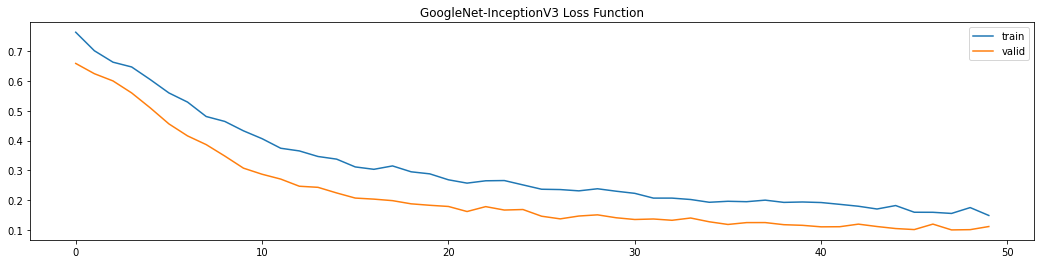

In [28]:
plt.figure(figsize=(18, 4))
plt.plot(hist.history['loss'], label = 'train')
plt.plot(hist.history['val_loss'], label = 'valid')
plt.legend()
plt.title('GoogleNet-InceptionV3 Loss Function')
plt.show()

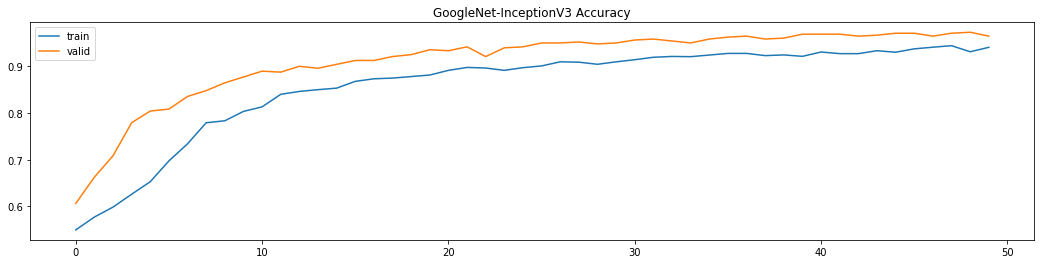

In [30]:
plt.figure(figsize=(18, 4))
plt.plot(hist.history['accuracy'], label = 'train')
plt.plot(hist.history['val_accuracy'], label = 'valid')
plt.legend()
plt.title('GoogleNet-InceptionV3 Accuracy')
plt.show()

In [34]:
#save model
model_.save("model_gnetinceptionV3.h5")

In [35]:
model = tf.keras.models.load_model("./model_gnetinceptionV3.h5")

In [36]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 63, 63, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 63, 63, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 63, 63, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

### Prediction

In [37]:
model.evaluate(test_generator)

16/16 [==============================] - 2s 45ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00


[0.0, 0.0]

In [38]:
predict = model.predict(test_generator, steps=np.ceil(len(df_test)/BATCH_SIZE))

In [39]:
prediction = predict.argmax(axis=-1)
df_test['Prediction'] = ["Male" if ele == 1 else "Female" for ele in prediction]

In [40]:
df_test

,Filename,Gender,Prediction
0,182644.jpg,Male,Male
1,182707.jpg,Female,Male
2,182717.jpg,Male,Male
3,182720.jpg,Male,Male
4,182775.jpg,Male,Male
...,...,...,...
491,202320.jpg,Female,Female
492,202340.jpg,Female,Female
493,202347.jpg,Female,Female
494,202357.jpg,Female,Female


In [41]:
labels = ['Male','Female']

cm = confusion_matrix(df_test['Gender'], df_test["Prediction"], labels= labels)
cm

array([[165,  10],
       [ 22, 299]], dtype=int64)

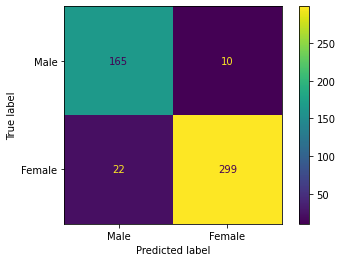

In [42]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot()
plt.show()

In [43]:
import sklearn.metrics as met
print(met.classification_report(df_test['Gender'], df_test['Prediction']))

              precision    recall  f1-score   support

      Female       0.97      0.93      0.95       321
        Male       0.88      0.94      0.91       175

    accuracy                           0.94       496
   macro avg       0.92      0.94      0.93       496
weighted avg       0.94      0.94      0.94       496

